# Downloading places of interest (POI) Data from OSM

Useful open street maps overpass API wrappers to download buildings and streets.

Downloaded 37954 buildings, 5584 streets
Building categories: {'home': 31427, 'other': 5639, 'retail': 545, 'workplace': 243, 'park': 100}

Sample buildings data:
  osm_type      subtype subtype_2 subtype_3 building_type osm_category  \
0      yes  residential      <NA>       NaN          home         home   
1      yes  residential      <NA>       NaN          home         home   
2      yes  residential      <NA>       NaN          home         home   
3      yes  residential      <NA>       NaN          home         home   
4      yes  residential      <NA>       NaN          home         home   

             addr:street     addr:city addr:state addr:housenumber  \
0    South Taylor Street  Philadelphia         PA             1702   
1    South Taylor Street  Philadelphia         PA             1700   
2      South 25th Street  Philadelphia         PA             1701   
3  South Ringgold Street  Philadelphia         PA             1654   
4  South Ringgold Street  Philadelphia    

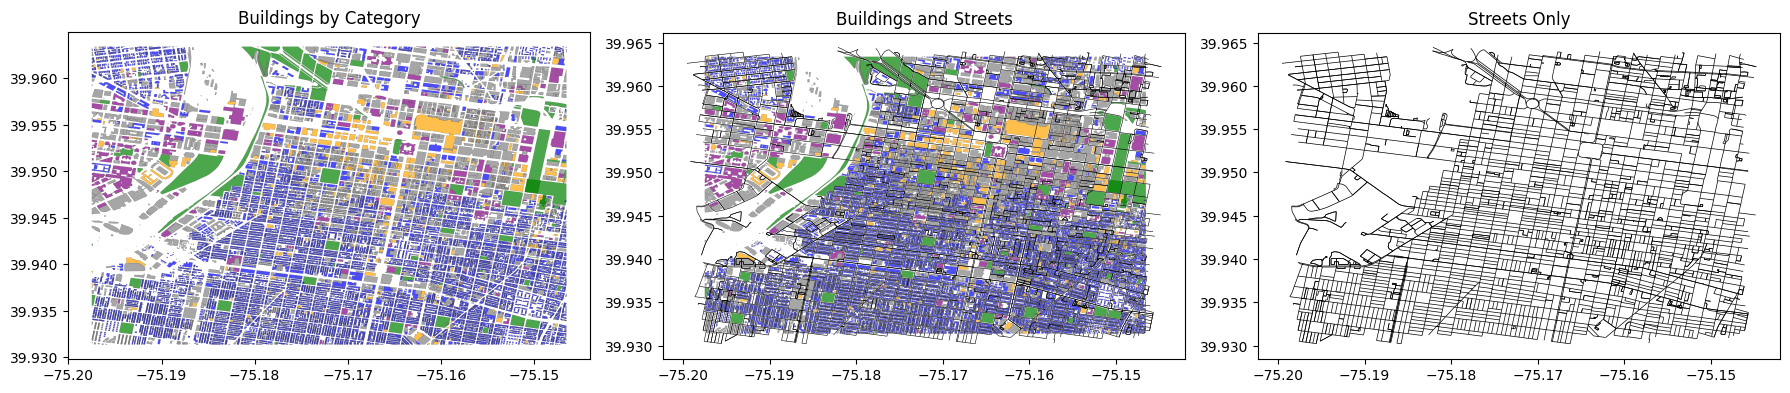

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from nomad.map_utils import download_osm_buildings, download_osm_streets, remove_overlaps

## Download by Bounding Box
bbox = (-75.19747721789525, 39.931392279878246, -75.14652246706544, 39.96336810441389)

# Download, process, and save
buildings = download_osm_buildings(bbox, schema='garden_city', clip=True, explode=True, infer_building_types=True)
streets = download_osm_streets(bbox, clip=True, explode=True)

buildings = remove_overlaps(buildings)

buildings.to_file("philadelphia_buildings.geojson", driver="GeoJSON")
streets.to_file("philadelphia_streets.geojson", driver="GeoJSON")

print(f"Downloaded {len(buildings)} buildings, {len(streets)} streets")
print(f"Building categories: {buildings['building_type'].value_counts().to_dict()}")

# Show sample of downloaded data
print("\nSample buildings data:")
print(buildings.head())

# Plot results
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

colors = {
    'park': 'green',
    'home': 'blue', 
    'retail': 'orange',
    'workplace': 'purple',
    'other': 'grey'
}

# Buildings by category with proper colors
for category, color in colors.items():
    subset = buildings[buildings['building_type'] == category]
    if len(subset) > 0:
        subset.plot(ax=axes[0], color=color, edgecolor='black', linewidth=0.1, alpha=0.7)
axes[0].set_title('Buildings by Category')
axes[0].set_aspect('equal')

# Buildings + Streets
for category, color in colors.items():
    subset = buildings[buildings['building_type'] == category]
    if len(subset) > 0:
        subset.plot(ax=axes[1], color=color, edgecolor='black', linewidth=0.08, alpha=0.7)
streets.plot(ax=axes[1], color='black', linewidth=0.4)
axes[1].set_title('Buildings and Streets')
axes[1].set_aspect('equal')

# Streets only
streets.plot(ax=axes[2], color='black', linewidth=0.5)
axes[2].set_title('Streets Only')
axes[2].set_aspect('equal')

plt.tight_layout()
plt.show(block=False)

Downloaded 7940 buildings, 16761 streets
Building categories: {'other': 6086, 'home': 1550, 'workplace': 155, 'retail': 135, 'park': 14}

Sample Salem buildings data:
     osm_type      subtype subtype_2 subtype_3 building_type osm_category  \
0         yes      unknown      <NA>       NaN         other        other   
1         yes      unknown      <NA>       NaN         other        other   
3  apartments  residential      <NA>       NaN          home         home   
5  apartments  residential      <NA>       NaN          home         home   
7         yes      unknown      <NA>       NaN         other        other   

     addr:street   addr:city addr:state addr:housenumber addr:postcode  \
0            NaN         NaN         NJ              NaN           NaN   
1            NaN         NaN         NJ              NaN           NaN   
3  Bailey Street  Pilesgrove        NaN               10         08098   
5   Alloway Road   Woodstown        NaN               21         08098   


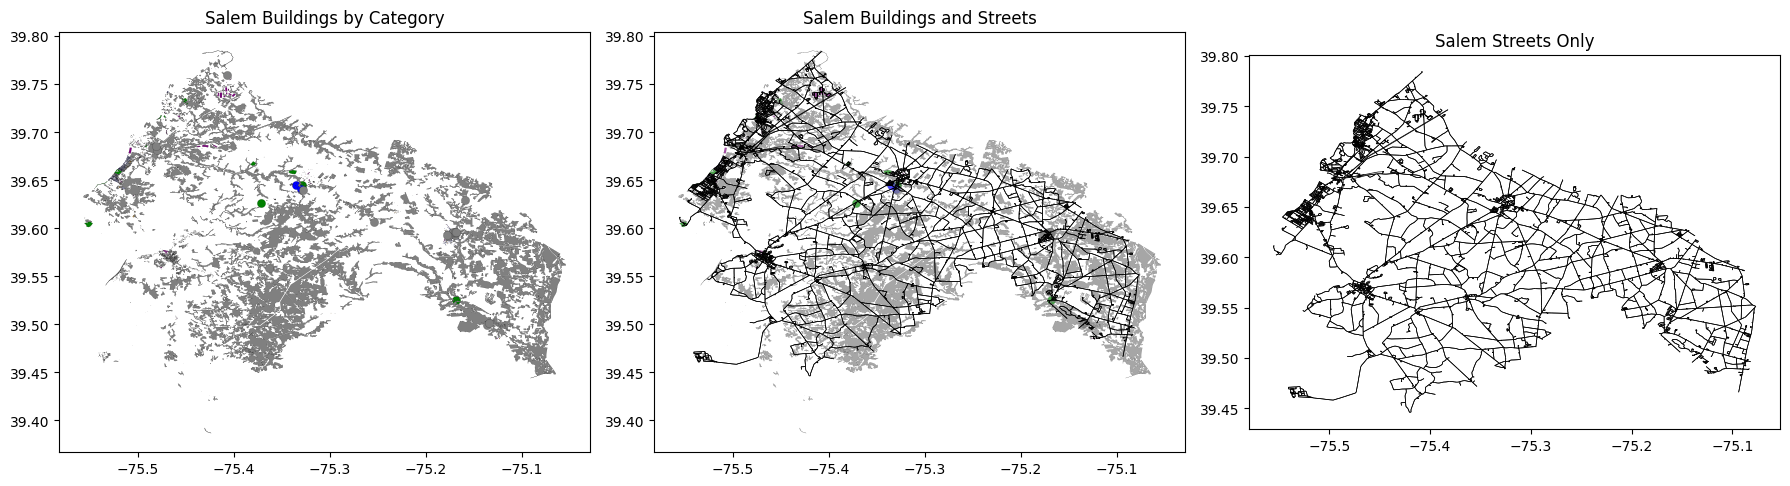

In [2]:
## Download geometries by City Name
city_name = 'Salem, New Jersey'

salem_buildings = download_osm_buildings(city_name, schema='garden_city', explode=True, infer_building_types=True)
salem_streets = download_osm_streets(city_name, explode=True)

# Remove overlaps
salem_buildings = remove_overlaps(salem_buildings)

# Save data
salem_buildings.to_file("salem_buildings.geojson", driver="GeoJSON")
salem_streets.to_file("salem_streets.geojson", driver="GeoJSON")

print(f"Downloaded {len(salem_buildings)} buildings, {len(salem_streets)} streets")
print(f"Building categories: {salem_buildings['building_type'].value_counts().to_dict()}")
# Show sample of downloaded data
print("\nSample Salem buildings data:")
print(salem_buildings.head())

print("\nSample Salem streets data:")
print(salem_streets.head())

# Plot Salem results
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

colors = {
    'park': 'green',
    'home': 'blue', 
    'retail': 'orange',
    'workplace': 'purple',
    'other': 'grey'
}

# Buildings by category
for category, color in colors.items():
    subset = salem_buildings[salem_buildings['building_type'] == category]
    if len(subset) > 0:
        subset.plot(ax=axes[0], color=color, edgecolor='black', linewidth=0.1)
axes[0].set_title('Salem Buildings by Category')
axes[0].set_aspect('equal')

# Buildings + Streets
for category, color in colors.items():
    subset = salem_buildings[salem_buildings['building_type'] == category]
    if len(subset) > 0:
        subset.plot(ax=axes[1], color=color, edgecolor='black', linewidth=0.08, alpha=0.7)
salem_streets.plot(ax=axes[1], color='black', linewidth=0.5)
axes[1].set_title('Salem Buildings and Streets')
axes[1].set_aspect('equal')

# Streets only
salem_streets.plot(ax=axes[2], color='black', linewidth=0.5)
axes[2].set_title('Salem Streets Only')
axes[2].set_aspect('equal')

plt.tight_layout()
plt.show(block=False)